In [6]:
# Install the needed libraries

%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
# Get the data csv
import pandas as pd

df = pd.read_csv("./data/main.csv")
print(df)

     year region population_estimate_15_over  population_standard_error  \
0    2018    ncr                       9,186                        NaN   
1    2018    car                       1,270                        NaN   
2    2018      1                       3,520                        NaN   
3    2018      2                       2,403                        NaN   
4    2018      3                       7,889                        NaN   
..    ...    ...                         ...                        ...   
114  2025     10                         NaN                        NaN   
115  2025     11                         NaN                        NaN   
116  2025     12                         NaN                        NaN   
117  2025     13                         NaN                        NaN   
118  2025  barmm                         NaN                        NaN   

     population_cov labor_force_estimate  labor_force_standard_error  \
0               NaN        

    poverty     crime
0    311.53  145069.0
1    214.30    7180.0
2    509.97   31230.0
3    579.14   11586.0
4    837.91   43003.0
5   1112.16   47053.0
6    469.22    6795.0
7   1635.93   25435.0
8    652.59   27900.0
9    994.87   64417.0
10  1421.95   10284.0
11  1211.95   13736.0
12  1120.44   13553.0
13   974.73   13563.0
14  1208.94   17882.0
15   823.94    9348.0
16  2627.03    2359.0
17   493.41   38042.0
18   184.53    1926.0
19   774.40    5978.0
20   571.44    9668.0
21  1454.45   22631.0
22  1692.76   34148.0
23   691.35    3514.0
24  1857.03    8627.0
25   826.95   10358.0
26  1818.10   24390.0
27  1418.19    6060.0
28  1153.33    4896.0
29  1332.39    7966.0
30   919.63   33753.0
31  1290.43    6481.0
32   935.82    5447.0
33  1634.76    2507.0
34   267.78   38312.0
35   130.13    1973.0
36   662.06    4806.0
37   388.37    4251.0
38  1056.54   16060.0
39  1350.03   31793.0
40   771.73    3856.0
41  1770.58    8550.0
42   667.02   11794.0
43  1163.85   25427.0
44  1368.3

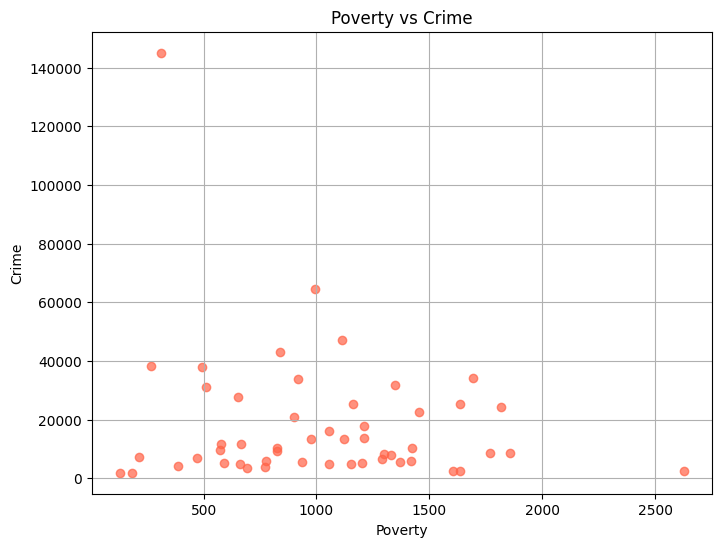

In [59]:
# Scatter plot
# Poverty - Crime

import matplotlib.pyplot as plt

# Remove the comma from all the numbers
df = df.replace(",", "", regex=True)

# Urban + Rural
df["poverty_urban"] = pd.to_numeric(df["poverty_urban"])
df["poverty_rural"] = pd.to_numeric(df["poverty_rural"])
df["poverty"] = df[["poverty_urban", "poverty_rural"]].sum(axis=1)

# Index + Nonindex
df["index_crime"] = pd.to_numeric(df["index_crime"])
df["nonindex_crime"] = pd.to_numeric(df["nonindex_crime"])
df["crime"] = df[["index_crime", "nonindex_crime"]].sum(axis=1)

# Remove the ones with mixing data points
poverty_crime_df = df[["poverty", "crime"]]
poverty_crime_df = poverty_crime_df[~((poverty_crime_df==0).any(axis=1))].reset_index(drop=True)
print(poverty_crime_df)

# Plot in a Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x=poverty_crime_df["poverty"], y=poverty_crime_df["crime"], alpha=0.7, color="tomato")
plt.title("Poverty vs Crime")
plt.xlabel("Poverty")
plt.ylabel("Crime")
plt.grid(True)
plt.show()

    employment     crime
0         93.4  145069.0
1         95.9    7180.0
2         93.2   31230.0
3         97.0   11586.0
4         94.2   43003.0
..         ...       ...
82        94.7    8262.0
83        96.9   20912.0
84        96.8    4792.0
85        97.0    5176.0
86        96.4    2621.0

[87 rows x 2 columns]


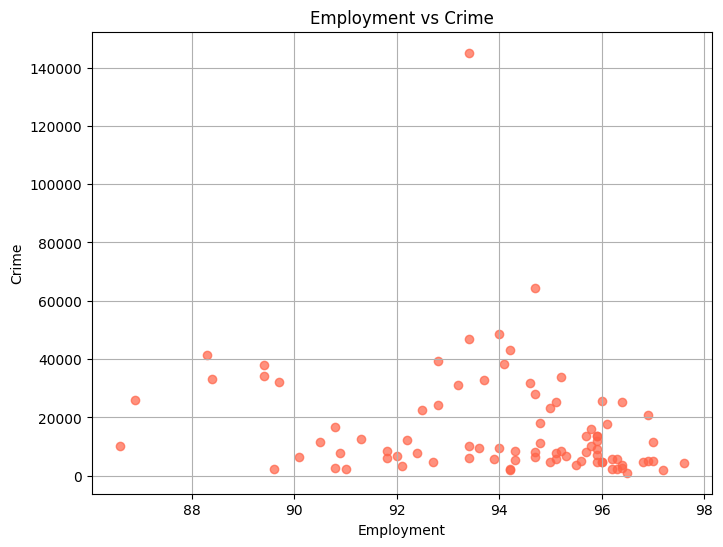

In [70]:
# Scatter plot
# Employment - Crime

# Employment
df["employment"] = pd.to_numeric(df["employment_rate"])

# Crime was taken from the previous code block

# Remove the ones with mixing data points
employment_crime_df = df[["employment", "crime"]]
employment_crime_df = employment_crime_df[~((employment_crime_df==0).any(axis=1))].reset_index(drop=True)
employment_crime_df = employment_crime_df.dropna().reset_index(drop=True)
print(employment_crime_df)

# Plot in a Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x=employment_crime_df["employment"], y=employment_crime_df["crime"], alpha=0.7, color="tomato")
plt.title("Employment vs Crime")
plt.xlabel("Employment")
plt.ylabel("Crime")
plt.grid(True)
plt.show()